# Problem statement

##### -This dataset contain player behavior in online gaming environments.
##### -It includes variables such as player gender,age and other details and a target variable reflecting player addiction
##### - Target variable: EngagementLevel

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
smote=SMOTE()
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data=pd.read_csv(r"D:\edu dataset\gaming_behavior.csv")
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,High
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,High
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,High
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,High


In [3]:
def get_stats(x):
    frame_dict = {'Column':[], 'Non-null counts':[], 'Null values':[], 'Number of unique':[], 'Unique values':[], 'Data type':[]}
    for col in x.columns:
        frame_dict['Column'].append(col)
        frame_dict['Non-null counts'].append(x[col].count())
        frame_dict['Null values'].append(x[col].isnull().sum())
        frame_dict['Number of unique'].append(x[col].nunique())
        frame_dict['Unique values'].append(x[col].unique())

        frame_dict['Data type'].append(x[col].dtype)

    return pd.DataFrame(frame_dict)

In [4]:
get_stats(data)

,Column,Non-null counts,Null values,Number of unique,Unique values,Data type
0,PlayerID,40034,0,40034,"[9000, 9001, 9002, 9003, 9004, 9005, 9006, 900...",int64
1,Age,40034,0,35,"[43, 29, 22, 35, 33, 37, 25, 38, 17, 36, 16, 4...",int64
2,Gender,40034,0,2,"[Male, Female]",object
3,Location,40034,0,4,"[Other, USA, Europe, Asia]",object
4,GameGenre,40034,0,5,"[Strategy, Sports, Action, RPG, Simulation]",object
5,PlayTimeHours,40034,0,40034,"[16.271118760553215, 5.525961380570566, 8.2237...",float64
6,InGamePurchases,40034,0,2,"[0, 1]",int64
7,GameDifficulty,40034,0,3,"[Medium, Easy, Hard]",object
8,SessionsPerWeek,40034,0,20,"[6, 5, 16, 9, 2, 1, 10, 13, 8, 0, 3, 4, 18, 14...",int64
9,AvgSessionDurationMinutes,40034,0,170,"[108, 144, 142, 85, 131, 81, 50, 48, 101, 95, ...",int64


In [5]:
print(data.shape)

(40034, 13)


In [6]:
data.EngagementLevel.value_counts()

EngagementLevel
High    29710
Low     10324
Name: count, dtype: int64

In [7]:
data.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [8]:
data.tail()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,High
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,High
40033,49033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,High


In [9]:
data.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [10]:
data.dtypes

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

##### Dropping the unique id column because we no longer need it

In [11]:
data1=data.drop(["PlayerID"],axis=1)
data1.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,High
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,High
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,High
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,High


In [12]:
data1.shape

(40034, 12)

# Missing Value Treatment

In [13]:
data1.isnull().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

###### in this dataset there is no missing values

# Datatype conversion

In [14]:
data1.dtypes

Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

##### we have to convert all datatypes into numerical format

In [15]:
data1.head(2)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,High
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,High


##### using label encoder we are converting the datatype

##### Gender

In [16]:
data.Gender.value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

In [17]:
data1.Gender=le.fit_transform(data1.Gender)

In [18]:
data1.Gender.value_counts()

Gender
1    23959
0    16075
Name: count, dtype: int64

#### Location

In [19]:
data.Location.value_counts()

Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

In [20]:
data1.Location=le.fit_transform(data1.Location)

In [21]:
data1.Location.value_counts()

Location
3    16000
1    12004
0     8095
2     3935
Name: count, dtype: int64

#### GameGenre

In [22]:
data.GameGenre.value_counts()

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [23]:
data1.GameGenre=le.fit_transform(data1.GameGenre)

In [24]:
data1.GameGenre.value_counts()

GameGenre
3    8048
0    8039
4    8012
2    7983
1    7952
Name: count, dtype: int64

#### GameDifficulty

In [25]:
data.GameDifficulty.value_counts()

GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

In [26]:
data1.GameDifficulty=le.fit_transform(data1.GameDifficulty)

In [27]:
data1.GameDifficulty.value_counts()

GameDifficulty
0    20015
2    12011
1     8008
Name: count, dtype: int64

##### EngagementLevel

In [28]:
data.EngagementLevel.value_counts()

EngagementLevel
High    29710
Low     10324
Name: count, dtype: int64

In [29]:
data1.EngagementLevel=le.fit_transform(data1.EngagementLevel)

In [30]:
data1.EngagementLevel.value_counts()

EngagementLevel
0    29710
1    10324
Name: count, dtype: int64

In [31]:
data1.dtypes

Age                            int64
Gender                         int32
Location                       int32
GameGenre                      int32
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                 int32
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel                int32
dtype: object

# EDA

# Visualization

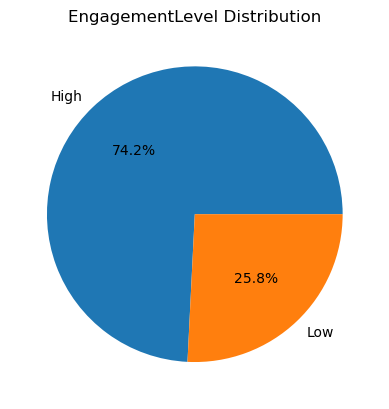

In [32]:
plt.pie(data1['EngagementLevel'].value_counts(), labels=data['EngagementLevel'].value_counts().index, autopct='%1.1f%%')
plt.title('EngagementLevel Distribution')
plt.show()

##### From the above graph we can conclude that
##### players are highly engaged(addicted) to game

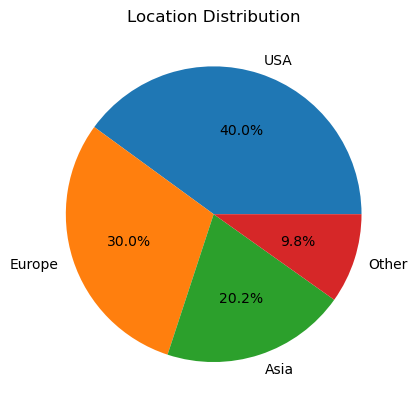

In [33]:
plt.pie(data1['Location'].value_counts(), labels=data['Location'].value_counts().index, autopct='%1.1f%%')
plt.title('Location Distribution')
plt.show()

##### From the above graph we can conclude that
##### players from USA are more into games than all other locations

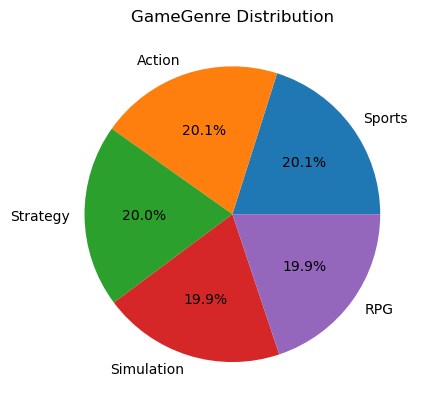

In [34]:
plt.pie(data1['GameGenre'].value_counts(), labels=data['GameGenre'].value_counts().index, autopct='%1.1f%%')
plt.title('GameGenre Distribution')
plt.show()

##### from the above graph we can conclude
##### players prefer Action and Sports games the most

Text(0, 0.5, 'Count')

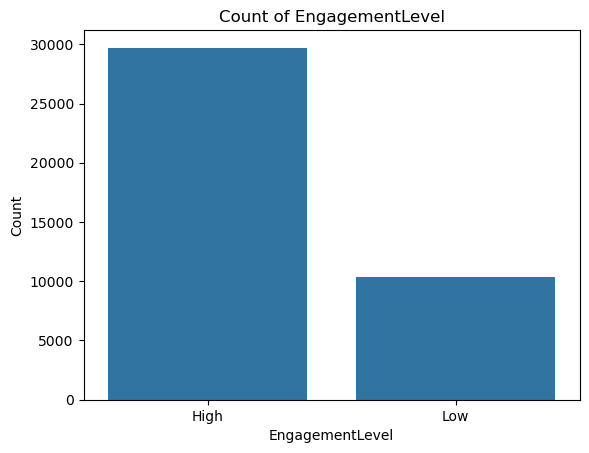

In [35]:
sns.countplot(x='EngagementLevel', data=data)
plt.title('Count of EngagementLevel')
plt.xlabel('EngagementLevel')
plt.ylabel('Count')

##### from the above graph we can conclude
##### Count of EngagementLevel is very high

Text(0, 0.5, 'Count')

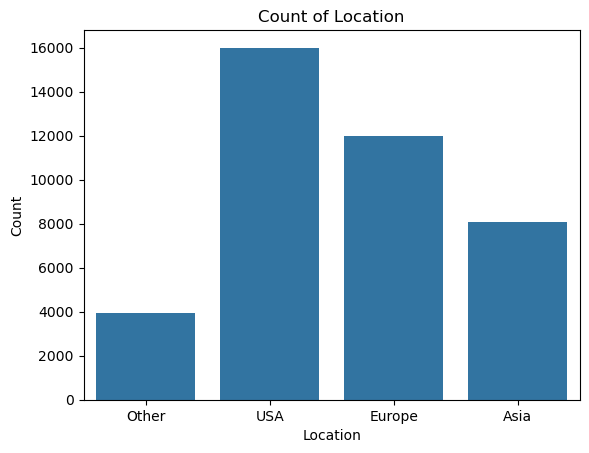

In [36]:
sns.countplot(x='Location', data=data)
plt.title('Count of Location')
plt.xlabel('Location')
plt.ylabel('Count')

##### from the above graph we can conclude
##### Count of USA players is very high

Text(0, 0.5, 'Count')

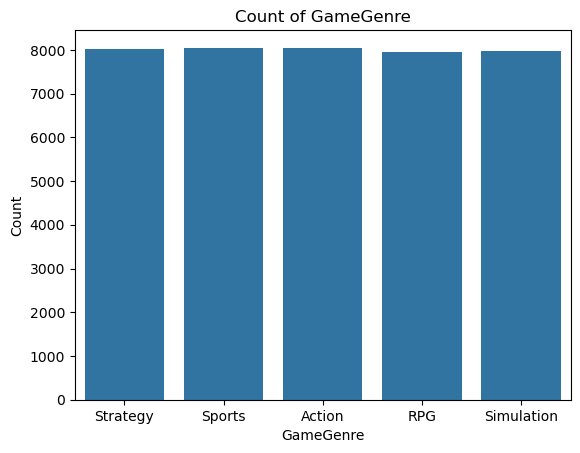

In [37]:
sns.countplot(x='GameGenre', data=data)
plt.title('Count of GameGenre')
plt.xlabel('GameGenre')
plt.ylabel('Count')

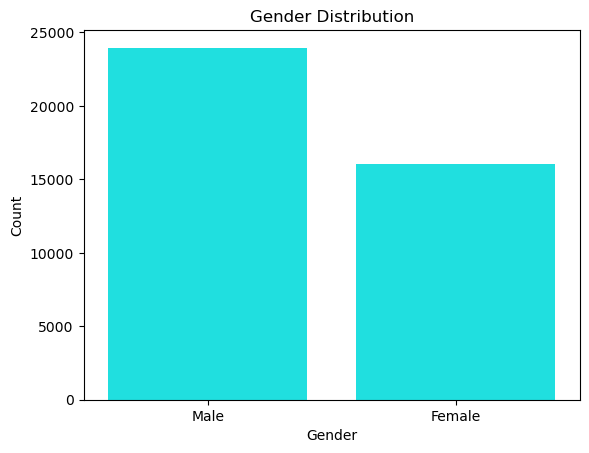

In [38]:
sns.countplot(x='Gender', data=data, color='cyan')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### from the above graph we can conclude
##### Count of Male is high than female

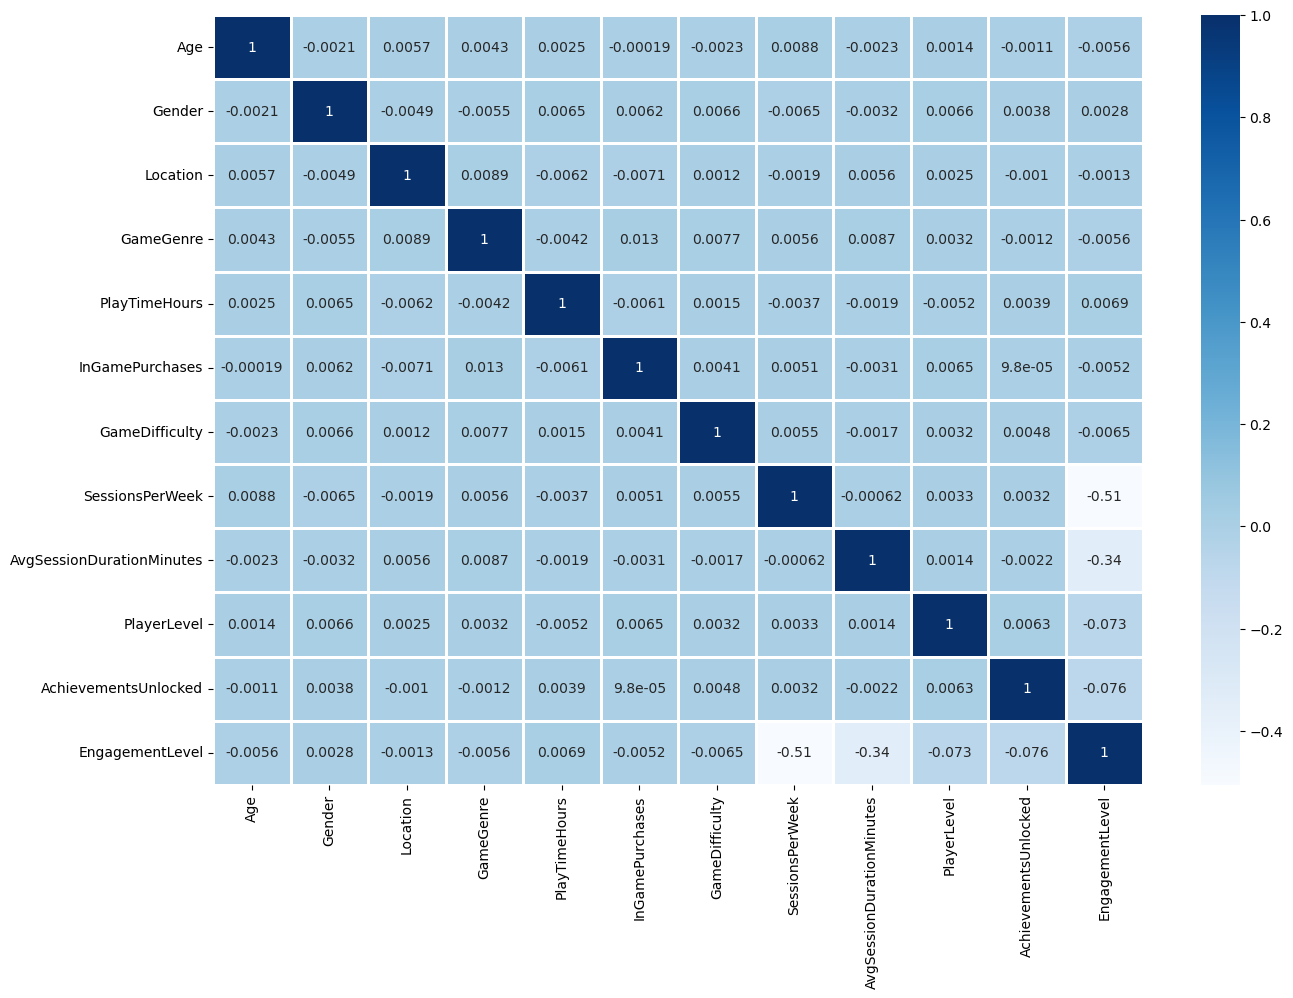

In [39]:
heatmap=data1.corr() 
heatmap
plt.figure(figsize=[15,10])
heatmap=sns.heatmap(heatmap,linewidth=1,annot=True,cmap=plt.cm.Blues)

# Test Train Split

In [40]:
data1

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,1,2,4,16.271119,0,2,6,108,79,25,0
1,29,0,3,4,5.525961,0,2,5,144,11,10,0
2,22,0,3,3,8.223755,0,0,16,142,35,41,0
3,35,1,3,0,5.265351,1,0,9,85,57,47,0
4,33,1,1,0,15.531945,0,2,2,131,95,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,1,3,4,20.619662,0,0,4,75,85,14,0
40030,44,0,2,2,13.539280,0,1,19,114,71,27,0
40031,15,0,3,1,0.240057,1,0,10,176,29,1,0
40032,34,1,3,3,14.017818,1,2,3,128,70,10,0


In [41]:
x=data1.iloc[:,0:11]
y=data1.iloc[:,11]
x.head()
#y.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,1,2,4,16.271119,0,2,6,108,79,25
1,29,0,3,4,5.525961,0,2,5,144,11,10
2,22,0,3,3,8.223755,0,0,16,142,35,41
3,35,1,3,0,5.265351,1,0,9,85,57,47
4,33,1,1,0,15.531945,0,2,2,131,95,37


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32027, 11), (8007, 11), (32027,), (8007,))

# Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [46]:
lg.fit(x_train,y_train)

LogisticRegression()

In [47]:
p1=lg.predict(x_test)
# p1

In [48]:
p_value=lg.predict_proba(x_test)
# p_value

In [49]:
m1=confusion_matrix(p1,y_test)
m1

array([[5565,  662],
       [ 370, 1410]], dtype=int64)

In [50]:
TN,FP,FN,TP=m1.ravel()

In [51]:
# lp=TP/(TP+FP)
lp=5565/(5565+662)
lp

0.8936887746908624

In [52]:
# lr=TP/(TP+FN)
lr=5565/(5565+1410)
lr

0.7978494623655914

In [53]:
lf1=2*(lp*lr)/(lp+lr)
lf1

0.8430540827147401

In [54]:
ac1=m1.diagonal().sum()/m1.sum()*100
ac1

87.11127763207193

In [55]:
print(classification_report(p1,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      6227
           1       0.68      0.79      0.73      1780

    accuracy                           0.87      8007
   macro avg       0.81      0.84      0.82      8007
weighted avg       0.88      0.87      0.87      8007



## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
d_predict=dt.predict(x_test)

In [59]:
d_m=confusion_matrix(d_predict,y_test)
d_m

array([[5497,  395],
       [ 438, 1677]], dtype=int64)

In [60]:
TN,FP,FN,TP=d_m.ravel()

In [61]:
dp=5501/(5501+395)
dp

0.9330054274084125

In [62]:
dr=5501/(5501+1677)
dr

0.7663694622457509

In [63]:
df1=2*(dp*dr)/(dp+dr)
df1

0.8415175156799756

In [64]:
d_acc=d_m.diagonal().sum()/d_m.sum()*100
d_acc

89.59660297239915

In [65]:
print(classification_report(d_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5892
           1       0.81      0.79      0.80      2115

    accuracy                           0.90      8007
   macro avg       0.87      0.86      0.87      8007
weighted avg       0.90      0.90      0.90      8007



# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
rp=rf.predict(x_test)

In [69]:
rp_value=rf.predict_proba(x_test)

In [70]:
r_m=confusion_matrix(rp,y_test)
r_m

array([[5784,  266],
       [ 151, 1806]], dtype=int64)

In [71]:
TN,FP,FN,TP=r_m.ravel()

In [72]:
rpr=5782/(5782+268)
rpr

0.955702479338843

In [73]:
rr=5782/(5782+1804)
rr

0.7621935143685737

In [74]:
rf1=2*(rpr*rr)/(rpr+rr)
rf1

0.8480492813141685

In [75]:
r_acc=r_m.diagonal().sum()/r_m.sum()*100
r_acc

94.7920569501686

In [76]:
print(classification_report(rp,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6050
           1       0.87      0.92      0.90      1957

    accuracy                           0.95      8007
   macro avg       0.92      0.94      0.93      8007
weighted avg       0.95      0.95      0.95      8007



# KNN- K Nearest Neighbor

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [79]:
kp=knn.predict(x_test)

In [80]:
k_m=confusion_matrix(kp,y_test)
k_m

array([[5771,  946],
       [ 164, 1126]], dtype=int64)

In [81]:
TN,FP,FN,TP=k_m.ravel()

In [82]:
kpr=5771/(5771+1126)
kpr

0.8367406118602291

In [83]:
kr=5771/(5771+946)
kr

0.8591633169569748

In [84]:
kf1=2*(kpr*kr)/(kpr+kr)
kf1

0.847803731452916

In [85]:
k_acc=k_m.diagonal().sum()/k_m.sum()*100
k_acc

86.13713001124016

In [86]:
print(classification_report(kp,y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6717
           1       0.54      0.87      0.67      1290

    accuracy                           0.86      8007
   macro avg       0.76      0.87      0.79      8007
weighted avg       0.90      0.86      0.87      8007



# SVM - Support Vector Machine

In [87]:
from sklearn.svm import SVC
svc=SVC()

In [88]:
svc.fit(x_train,y_train)

SVC()

In [89]:
sp=svc.predict(x_test)
#sp

In [90]:
sm=confusion_matrix(sp,y_test)
sm

array([[5786,  345],
       [ 149, 1727]], dtype=int64)

In [91]:
TN,FP,FN,TP=sm.ravel()

In [92]:
sp1=5786/(5786+345)
sp1

0.9437285923992823

In [93]:
sr=5786/(5786+1727)
sr

0.7701317715959004

In [94]:
sf1=2*(sp1*sr)/(sp1+sr)
sf1

0.8481383758428613

In [95]:
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc

93.83039840139877

In [96]:
print(classification_report(sp,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      6131
           1       0.83      0.92      0.87      1876

    accuracy                           0.94      8007
   macro avg       0.90      0.93      0.92      8007
weighted avg       0.94      0.94      0.94      8007



# Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [98]:
nb.fit(x_train,y_train)

MultinomialNB()

In [99]:
np=nb.predict(x_test)
#np

In [100]:
n_m=confusion_matrix(np,y_test)
n_m

array([[4337,  691],
       [1598, 1381]], dtype=int64)

In [101]:
TN,FP,FN,TP=n_m.ravel()

In [102]:
np1=4337/(4337+691)
np1

0.8625696101829753

In [103]:
nr=4337/(4337+1381)
nr

0.7584819867086394

In [104]:
nf1=2*(np1*nr)/(np1+nr)
nf1

0.8071840684906011

In [105]:
n_acc=n_m.diagonal().sum()/n_m.sum()*100
n_acc

71.41251405020607

In [106]:
print(classification_report(np,y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      5028
           1       0.67      0.46      0.55      2979

    accuracy                           0.71      8007
   macro avg       0.70      0.66      0.67      8007
weighted avg       0.71      0.71      0.70      8007



# Combained Report

In [107]:
list1=["logistic","DT","RF","KNN","SVM","NB"]
list2=[ac1,d_acc,r_acc,k_acc,s_acc,n_acc]
list3=[lp,dp,rpr,kpr,sp1,np1]
list4=[lr,dr,rr,kr,sr,nr]
list5=[lf1,df1,rf1,kf1,sf1,nf1]

In [108]:
Result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_Score":list5})
Result

,model_name,Accuracy,Precision,Recall,F1_Score
0,logistic,87.111278,0.893689,0.797849,0.843054
1,DT,89.596603,0.933005,0.766369,0.841518
2,RF,94.792057,0.955702,0.762194,0.848049
3,KNN,86.137130,0.836741,0.859163,0.847804
4,SVM,93.830398,0.943729,0.770132,0.848138
5,NB,71.412514,0.862570,0.758482,0.807184


#### From the above models Random Forest is the best model because it has good accuracy and precision recall scores

# AUC & ROC 

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [110]:
roc=roc_auc_score(rp,y_test)
roc

0.9394370705709956

In [111]:
df=pd.DataFrame(rp_value)
df

,0,1
0,0.98,0.02
1,0.99,0.01
2,0.10,0.90
3,0.96,0.04
4,0.18,0.82
...,...,...
8002,0.99,0.01
8003,0.32,0.68
8004,0.09,0.91
8005,0.65,0.35


In [112]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])
fpr

array([0.00000000e+00, 0.00000000e+00, 5.05475990e-04, 8.42459983e-04,
       1.17944398e-03, 2.02190396e-03, 2.52737995e-03, 3.36983993e-03,
       4.71777591e-03, 5.89721988e-03, 7.07666386e-03, 7.58213985e-03,
       9.26705981e-03, 1.06149958e-02, 1.14574558e-02, 1.21314238e-02,
       1.28053917e-02, 1.36478517e-02, 1.46588037e-02, 1.53327717e-02,
       1.58382477e-02, 1.60067397e-02, 1.68491997e-02, 1.70176917e-02,
       1.75231676e-02, 1.76916596e-02, 1.80286436e-02, 1.80286436e-02,
       1.80286436e-02, 1.80286436e-02, 1.81971356e-02, 1.81971356e-02,
       1.88711036e-02, 1.92080876e-02, 1.92080876e-02, 1.98820556e-02,
       1.98820556e-02, 2.00505476e-02, 2.02190396e-02, 2.05560236e-02,
       2.07245156e-02, 2.10614996e-02, 2.19039596e-02, 2.22409436e-02,
       2.24094356e-02, 2.27464195e-02, 2.27464195e-02, 2.34203875e-02,
       2.37573715e-02, 2.51053075e-02, 2.54422915e-02, 2.67902275e-02,
       2.72957035e-02, 2.93176074e-02, 2.94860994e-02, 3.01600674e-02,
      

In [113]:
tpr

array([0.        , 0.00241313, 0.00675676, 0.02220077, 0.04584942,
       0.07722008, 0.11583012, 0.16216216, 0.20222008, 0.25627413,
       0.30694981, 0.36003861, 0.40106178, 0.44208494, 0.48262548,
       0.51303089, 0.54391892, 0.57866795, 0.61438224, 0.63899614,
       0.65733591, 0.67712355, 0.69546332, 0.71090734, 0.71959459,
       0.73166023, 0.74227799, 0.75337838, 0.76544402, 0.77413127,
       0.78281853, 0.79054054, 0.79584942, 0.80212355, 0.80743243,
       0.81274131, 0.81998069, 0.82528958, 0.83156371, 0.83542471,
       0.84073359, 0.84411197, 0.84893822, 0.85376448, 0.85762548,
       0.86052124, 0.86293436, 0.86486486, 0.86727799, 0.86920849,
       0.87162162, 0.875     , 0.87789575, 0.88030888, 0.88320463,
       0.88465251, 0.88851351, 0.88851351, 0.89044402, 0.89237452,
       0.89382239, 0.89527027, 0.89527027, 0.89623552, 0.8976834 ,
       0.89816602, 0.8996139 , 0.90009653, 0.90106178, 0.9015444 ,
       0.90202703, 0.90299228, 0.90444015, 0.90444015, 0.90588

In [114]:
fpr

array([0.00000000e+00, 0.00000000e+00, 5.05475990e-04, 8.42459983e-04,
       1.17944398e-03, 2.02190396e-03, 2.52737995e-03, 3.36983993e-03,
       4.71777591e-03, 5.89721988e-03, 7.07666386e-03, 7.58213985e-03,
       9.26705981e-03, 1.06149958e-02, 1.14574558e-02, 1.21314238e-02,
       1.28053917e-02, 1.36478517e-02, 1.46588037e-02, 1.53327717e-02,
       1.58382477e-02, 1.60067397e-02, 1.68491997e-02, 1.70176917e-02,
       1.75231676e-02, 1.76916596e-02, 1.80286436e-02, 1.80286436e-02,
       1.80286436e-02, 1.80286436e-02, 1.81971356e-02, 1.81971356e-02,
       1.88711036e-02, 1.92080876e-02, 1.92080876e-02, 1.98820556e-02,
       1.98820556e-02, 2.00505476e-02, 2.02190396e-02, 2.05560236e-02,
       2.07245156e-02, 2.10614996e-02, 2.19039596e-02, 2.22409436e-02,
       2.24094356e-02, 2.27464195e-02, 2.27464195e-02, 2.34203875e-02,
       2.37573715e-02, 2.51053075e-02, 2.54422915e-02, 2.67902275e-02,
       2.72957035e-02, 2.93176074e-02, 2.94860994e-02, 3.01600674e-02,
      

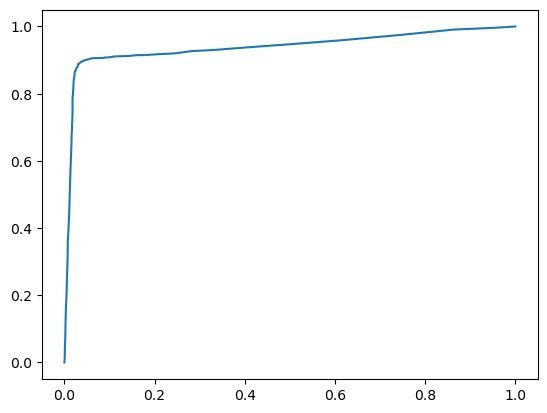

In [115]:
plt.plot(fpr,tpr)

# Class Imbalance

In [116]:
import random

In [117]:
data1.EngagementLevel.value_counts()

EngagementLevel
0    29710
1    10324
Name: count, dtype: int64

In [118]:
c_0,c_1=data1["EngagementLevel"].value_counts()
c_0,c_1

(29710, 10324)

In [119]:
train_0=data1[data1["EngagementLevel"]==0]
train_1=data1[data1["EngagementLevel"]==1]
train_0.shape,train_1.shape

((29710, 12), (10324, 12))

# Random Undersampling

In [120]:
class_0_under=train_0.sample(c_1)

In [121]:
class_0_1=pd.concat([class_0_under,train_1],axis=0)

In [122]:
class_0_1.shape

(20648, 12)

In [123]:
class_0_1.EngagementLevel.value_counts()

EngagementLevel
0    10324
1    10324
Name: count, dtype: int64

# Random Oversampling

In [124]:
class_1_over=train_1.sample(c_0,replace=True)

In [125]:
class_1_0=pd.concat([class_1_over,train_0],axis=0)

In [126]:
class_1_0.shape

(59420, 12)

In [127]:
class_1_0["EngagementLevel"].value_counts()

EngagementLevel
1    29710
0    29710
Name: count, dtype: int64

# IMBLearn Oversampling

In [128]:
x=data1.iloc[:,0:11]
y=data1.iloc[:,11]
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: EngagementLevel, dtype: int32

In [129]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [130]:
ab1=RandomOverSampler(random_state=42)
x1,y1=ab1.fit_resample(x,y)

In [131]:
x1.shape,y1.shape

((59420, 11), (59420,))

# IMBLearn Undersampling

In [132]:
from imblearn.under_sampling import RandomUnderSampler

In [133]:
a2=RandomUnderSampler(sampling_strategy="all")

In [134]:
x2,y2=a2.fit_resample(x,y)

In [135]:
x2.shape,y2.shape

((20648, 11), (20648,))

# Nearmiss

In [136]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [137]:
x_nm,y_nm=nm.fit_resample(x,y)

In [138]:
x_nm.shape,y_nm.shape

((20648, 11), (20648,))

In [139]:
y_nm.value_counts()

EngagementLevel
0    10324
1    10324
Name: count, dtype: int64

# We have tried all Class Imbalance technique and we are carrying with SMOTE

# SMOTE

In [140]:
x_smote,y_smote=smote.fit_resample(x,y)

In [141]:
x_smote.shape,y_smote.shape

((59420, 11), (59420,))

In [142]:
y_smote.value_counts()

EngagementLevel
0    29710
1    29710
Name: count, dtype: int64

# Outlier treatment

<Axes: >

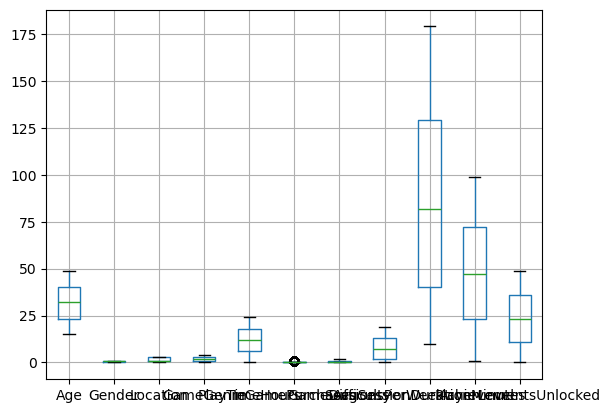

In [143]:
x_smote.boxplot()

In [144]:
x_smote.skew()

Age                          0.002904
Gender                      -0.089354
Location                     0.018597
GameGenre                    0.107403
PlayTimeHours               -0.004816
InGamePurchases              1.979429
GameDifficulty               0.612266
SessionsPerWeek              0.370374
AvgSessionDurationMinutes    0.188827
PlayerLevel                  0.073940
AchievementsUnlocked         0.046054
dtype: float64

<Axes: ylabel='Age'>

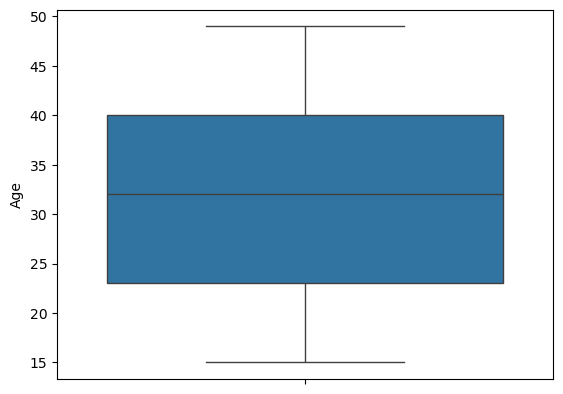

In [145]:
sns.boxplot(data=x_smote,y="Age")

##### no outliers in age

<Axes: ylabel='PlayTimeHours'>

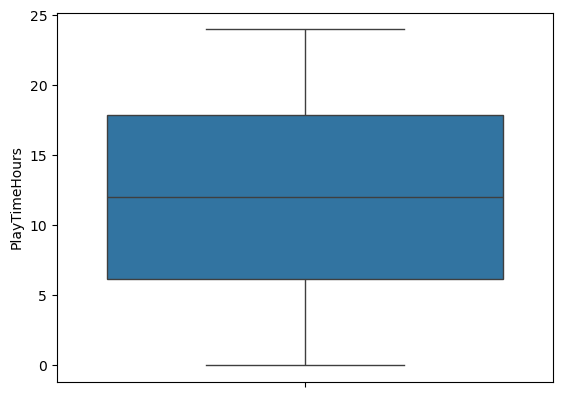

In [146]:
sns.boxplot(data=x_smote,y="PlayTimeHours")

##### no outliers in PlayTimeHours

<Axes: ylabel='PlayerLevel'>

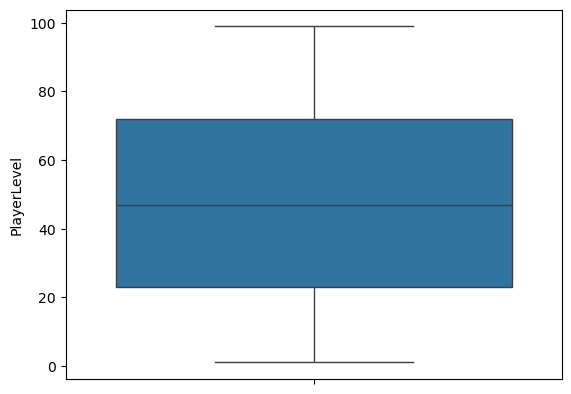

In [147]:
sns.boxplot(data=x_smote,y="PlayerLevel")

##### no outliers in PlayerLevel

<Axes: ylabel='AchievementsUnlocked'>

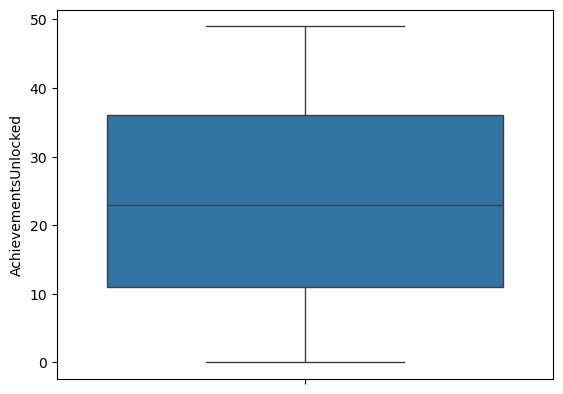

In [148]:
sns.boxplot(data=x_smote,y="AchievementsUnlocked")

##### no outliers in AchievementsUnlocked

# Skewness treatment

In [149]:
x_smote.skew()

Age                          0.002904
Gender                      -0.089354
Location                     0.018597
GameGenre                    0.107403
PlayTimeHours               -0.004816
InGamePurchases              1.979429
GameDifficulty               0.612266
SessionsPerWeek              0.370374
AvgSessionDurationMinutes    0.188827
PlayerLevel                  0.073940
AchievementsUnlocked         0.046054
dtype: float64

In [150]:
##### There is no skewness in this dataset

# Splitting Data(SMOTE)

In [151]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x_smote,y_smote,test_size=0.2,random_state=101)

In [152]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((47536, 11), (11884, 11), (47536,), (11884,))

# Logistic regression

In [153]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [154]:
p1_smote=lg.predict(x1_te)
#p1_smote

In [155]:
p_value_smote=lg.predict_proba(x1_te)
#p_value_smote

In [156]:
m1_smote=confusion_matrix(p1_smote,y1_te)
m1_smote

array([[5017,  802],
       [ 920, 5145]], dtype=int64)

In [157]:
TN,FP,FN,TP=m1_smote.ravel()

In [158]:
# lp=TP/(TP+FP)
lp_smote=4997/(4997+805)
lp_smote

0.8612547397449155

In [159]:
# lr=TP/(TP+FN)
lr_smote=4997/(4997+5142)
lr_smote

0.49284939343130485

In [160]:
lf1_smote=2*(lp_smote*lr_smote)/(lp_smote+lr_smote)
lf1_smote

0.6269368295589989

In [161]:
ac1_smote=m1_smote.diagonal().sum()/m1_smote.sum()*100
ac1_smote

85.50992931672837

In [162]:
print(classification_report(p1_smote,y1_te))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5819
           1       0.87      0.85      0.86      6065

    accuracy                           0.86     11884
   macro avg       0.86      0.86      0.86     11884
weighted avg       0.86      0.86      0.86     11884



# Decision tree

In [163]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [164]:
d_predict_smote=dt.predict(x1_te)

In [165]:
d_m_smote=confusion_matrix(d_predict_smote,y1_te)
d_m_smote

array([[5270,  541],
       [ 667, 5406]], dtype=int64)

In [166]:
TN,FP,FN,TP=d_m_smote.ravel()

In [167]:
dp_smote=5242/(5242+551)
dp_smote

0.9048852062834455

In [168]:
dr_smote=5242/(5242+5396)
dr_smote

0.49276179733032527

In [169]:
df1_smote=2*(dp_smote*dr_smote)/(dp_smote+dr_smote)
df1_smote

0.6380621995009434

In [170]:
d_acc_smote=d_m_smote.diagonal().sum()/d_m_smote.sum()*100
d_acc_smote

89.83507236620667

In [171]:
print(classification_report(d_predict_smote,y1_te))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5811
           1       0.91      0.89      0.90      6073

    accuracy                           0.90     11884
   macro avg       0.90      0.90      0.90     11884
weighted avg       0.90      0.90      0.90     11884



# Random Forest

In [172]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [173]:
rp_smote=rf.predict(x1_te)

In [174]:
r_m_smote=confusion_matrix(rp_smote,y1_te)
r_m_smote

array([[5693,  464],
       [ 244, 5483]], dtype=int64)

In [175]:
rp_value_smote=rf.predict_proba(x1_te)

In [176]:
TN,FP,FN,TP=r_m_smote.ravel()

In [177]:
rpr_smote=5782/(5782+268)
rpr_smote

0.955702479338843

In [178]:
rr_smote=5782/(5782+1804)
rr_smote

0.7621935143685737

In [179]:
rf1_smote=2*(rpr_smote*rr_smote)/(rpr_smote+rr_smote)
rf1_smote

0.8480492813141685

In [180]:
r_acc_smote=r_m_smote.diagonal().sum()/r_m_smote.sum()*100
r_acc_smote

94.04240996297543

In [181]:
print(classification_report(rp_smote,y1_te))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6157
           1       0.92      0.96      0.94      5727

    accuracy                           0.94     11884
   macro avg       0.94      0.94      0.94     11884
weighted avg       0.94      0.94      0.94     11884



# KNN

In [182]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=25)

In [183]:
kp_smote=knn.predict(x1_te)

In [184]:
k_m_smote=confusion_matrix(kp_smote,y1_te)
k_m_smote

array([[4984,  597],
       [ 953, 5350]], dtype=int64)

In [185]:
TN,FP,FN,TP=k_m_smote.ravel()

In [186]:
kpr_smote=5771/(5771+1126)
kpr_smote

0.8367406118602291

In [187]:
kr_smote=5771/(5771+946)
kr_smote

0.8591633169569748

In [188]:
kf1_smote=2*(kpr_smote*kr_smote)/(kpr_smote+kr_smote)
kf1_smote

0.847803731452916

In [189]:
k_acc_smote=k_m_smote.diagonal().sum()/k_m_smote.sum()*100
k_acc_smote

86.95725345001682

In [190]:
print(classification_report(kp_smote,y1_te))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      5581
           1       0.90      0.85      0.87      6303

    accuracy                           0.87     11884
   macro avg       0.87      0.87      0.87     11884
weighted avg       0.87      0.87      0.87     11884



# SVM

In [ ]:
svc.fit(x1_tr,y1_tr)

In [ ]:
sp_smote=svc.predict(x1_te)
#sp

In [ ]:
sm_smote=confusion_matrix(sp_smote,y1_te)
sm_smote

In [ ]:
TN,FP,FN,TP=sm_smote.ravel()

In [ ]:
sp1_smote=5298/(5298+441)
sp1_smote

In [ ]:
sr_smote=5298/(5298+5506)
sr_smote

In [ ]:
sf1_smote=2*(sp1_smote*sr_smote)/(sp1_smote+sr_smote)
sf1_smote

In [ ]:
s_acc_smote=sm_smote.diagonal().sum()/sm_smote.sum()*100
s_acc_smote

In [ ]:
print(classification_report(sp_smote,y1_te))

# Naive Bayes

In [ ]:
nb.fit(x1_tr,y1_tr)

In [ ]:
np_smote=nb.predict(x1_te)
#np

In [ ]:
n_m_smote=confusion_matrix(np_smote,y1_te)
n_m_smote

In [ ]:
TN,FP,FN,TP=n_m_smote.ravel()

In [ ]:
np1_smote=4292/(4292+1813)
np1_smote

In [ ]:
nr_smote=4292/(4292+4134)
nr_smote

In [ ]:
nf1_smote=2*(np1_smote*nr_smote)/(np1_smote+nr_smote)
nf1_smote

In [ ]:
n_acc_smote=n_m_smote.diagonal().sum()/n_m_smote.sum()*100
n_acc_smote

In [ ]:
print(classification_report(np_smote,y1_te))

# Classification Report After SMOTE

In [ ]:
lista=["logistic","DT","RF","KNN","SVM","NB"]
listb=[ac1_smote,d_acc_smote,r_acc_smote,k_acc_smote,s_acc_smote,n_acc_smote]
listc=[lp_smote,dp_smote,rpr_smote,kpr_smote,sp1_smote,np1_smote]
listd=[lr_smote,dr_smote,rr_smote,kr_smote,sr_smote,nr_smote]
liste=[lf1_smote,df1_smote,rf1_smote,kf1_smote,sf1_smote,nf1_smote]

In [ ]:
Result_smote=pd.DataFrame({"model_name":lista,"Accuracy":listb,"Precision":list3,"Recall":list4,"F1_Score":list5})
Result_smote

#### From the above models Random Forest is the best model because it has good accuracy and precision recall scores

# AUC & ROC

In [ ]:
roc=roc_auc_score(rp_smote,y1_te)
roc

In [ ]:
df_smote=pd.DataFrame(rp_value_smote)
df_smote

In [ ]:
fpr,tpr,threshold=roc_curve(y1_te,df_smote.iloc[:,1])
fpr

In [ ]:
tpr

In [ ]:
fpr

In [ ]:
plt.plot(fpr,tpr)

# Feature selection

# chi-square technique

In [ ]:
cst=SelectKBest(score_func=chi2,k="all")

In [ ]:
cst_fit=cst.fit(x,y)
cst_fit

In [ ]:
cst_score=cst_fit.scores_
cst_score

In [ ]:
feature_df=pd.DataFrame(cst_score)
feature_df

In [ ]:
feature_df1=pd.DataFrame({"feature_score":list(cst_score),"columns":list(data1.iloc[:,0:11])})
feature_df1

#### Higher the chi value,higher the importance

In [ ]:
unwanted=["Age","Gender","Location","GameGenre","PlayTimeHours","InGamePurchases","GameDifficulty"]
new_data=x_smote.drop(unwanted,axis=1)

In [ ]:
new_data.head()

# Random forest(Chi square technique)

In [ ]:
feature_x=new_data
feature_y=y_smote

In [ ]:
feature_x_train,feature_x_test,feature_y_train,feature_y_test=train_test_split(feature_x,feature_y,test_size=0.2,random_state=101)

In [ ]:
feature_x_train.shape,feature_x_test.shape,feature_y_train.shape,feature_y_test.shape

In [ ]:
rf.fit(feature_x_train,feature_y_train)

In [ ]:
feature_rp=rf.predict(feature_x_test)

In [ ]:
feature_m=confusion_matrix(feature_rp,feature_y_test)
feature_m

In [ ]:
TN,FP,FN,TP=feature_m.ravel()

In [ ]:
feature_p=TP/(TP+FP)
feature_p

In [ ]:
feature_r=TP/(TP+FN)
feature_r

In [ ]:
feature_f1=2*(feature_p*feature_r)/(feature_p+feature_r)
feature_f1                      

In [ ]:
feature_acc=feature_m.diagonal().sum()/feature_m.sum()*100
feature_acc

In [ ]:
print(classification_report(feature_rp,feature_y_test))

# XgBoost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [ ]:
xgb.fit(x1_tr,y1_tr)

In [ ]:
xgb_p=xgb.predict(x1_te)

In [ ]:
xgb_m=confusion_matrix(xgb_p,y1_te)
xgb_m

In [ ]:
xgb_p1 = TP / (TP + FP)
xgb_p1

In [ ]:
xgb_r1 = TP / (TP + FN)
xgb_r1

In [ ]:
xgb_f1 = 2 * (xgb_p1 * xgb_r1) / (xgb_p1 +xgb_r1)
xgb_f1

In [ ]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

In [ ]:
 print(classification_report(xgb_p,y1_te))

In [ ]:
lista=["RF","Feature_selection","XgBoost"]
listb=[r_acc_smote,feature_acc,xgb_acc]
listc=[rpr_smote,feature_p,xgb_p1]
listd=[rr_smote,feature_r,xgb_r1]
liste=[rf1_smote,feature_f1,xgb_f1]
Result_1=pd.DataFrame({"model_name":lista,"Accuracy":listb,"Precision":listc,"Recall":listd,"F1_Score":liste})
Result_1

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores=cross_val_score(dt,feature_x,feature_y,cv=5)

In [ ]:
print(f"Cross-Validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

# Stratified KFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf=StratifiedKFold(n_splits=5)

In [ ]:
scores2=cross_val_score(dt,feature_x,feature_y,cv=skf)

In [ ]:
print(f"Stratified CV accuracy: {scores2.mean():.2f}")

In [ ]:
print(f"Standard deviation of CV scores: {scores2.std():.2f}")

# Conclusion

#### Reduces overfitting by ensuring that the model is evaluated on multiple data splits. Provides a better estimate of model performance on unseen data. We used Stratified Kfold method where our accuracy is quite good. Stratified CV accuracy: 0.90